# Problem Statement : Impact of marketing strategy over the past two years for drug NZT-48

 Import libraries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt

i/o functions 

In [2]:
def read_csv(path_to_data):
    """
    read a comma seperated file into pandas dataframe and ignore the first column
    path_to_data: location of the csvfile to be read
    :return: read output
    """
    data = pd.read_csv(path_to_data,index_col=0)
    return data

In [3]:
# Read the data
data = read_csv("data/data_20160405.csv")

### Data preprocessing

In [4]:
### Total number of records
len(data)

2976

In [5]:
###Total number of unique records
len(data.drop_duplicates(keep='first'))

2976

##### Analysis : There are no duplicates in the data , hence no record needs to be removed

In [6]:
### Features removed
### District feature doesn't hold any value as all the records only represent one district - Hence removed
data.groupby(['district'])['district'].count()
data = data.drop(columns=['district'])

In [7]:
#set date as index for ease of use
data.set_index('month', inplace=True)

In [8]:
### The earliest date from which the records are available
data.index.min()

'2013-10-01'

In [9]:
### The latest date of the record
data.index.max()

'2015-09-01'

#### Analysis  : The data is exactly for a period of 2 years, hence no records needs to be filtered out as the impact analysis is only for a period of 2 years

In [10]:
### Renaming certain columns for the purpose of understanding
data.columns = data.columns.str.replace('strategy1', 'strategy1_expenditure')
data.columns = data.columns.str.replace('strategy2', 'strategy2_expenditure')
data.columns = data.columns.str.replace('strategy3', 'strategy3_expenditure')

In [11]:
### We need to records where the strategy has been applied to the accounts. There are accounts where the strategy wasn't initiated 
### and hence those accounts can be removed 

accounts_w_strategies =  data.loc[(data[['strategy1_expenditure','strategy2_expenditure','strategy3_expenditure']] != 0).any(axis=1)]

In [12]:
(len(accounts_w_strategies) / len(data)) *100

31.317204301075268

In [13]:
len(accounts_w_strategies)

932

#### Analysis : Only 31.31% of the data can used for analysis



In [14]:
### Percentage of data where two or more marketing strategies are applied to the same count. For these the records the sales,quantity and sales visit are considered the same value for the marketing strategies seperately (mentioned in the technical report)

accounts_w_strategies['count_occurence'] = accounts_w_strategies[['strategy1_expenditure','strategy2_expenditure','strategy3_expenditure']].isin([0]).sum(1)

In [15]:
len(accounts_w_strategies[accounts_w_strategies['count_occurence'] <= 1])/len(accounts_w_strategies) *100

17.06008583690987

#### Analysis : 159 records (17%) among the accounts have more than one marketing strategy applied to them

In [16]:
accounts_w_strategies.index.min()

'2014-01-01'

In [17]:
accounts_w_strategies.index.max()

'2015-09-01'

In [18]:
### derive total expenditure that is total expenditure = sum(strategy expenditure + sum(expenditure on sales visit)) one and only if it is not 0 (market strategy is applied)

accounts_w_strategies['total_str1_expenditure'] = accounts_w_strategies[['salesVisit1','salesVisit2','salesVisit3','salesVisit4','salesVisit5','strategy1_expenditure']].sum(axis=1).where(accounts_w_strategies['strategy1_expenditure'] > 0, 0)
accounts_w_strategies['total_str2_expenditure'] = accounts_w_strategies[['salesVisit1','salesVisit2','salesVisit3','salesVisit4','salesVisit5','strategy2_expenditure']].sum(axis=1).where(accounts_w_strategies['strategy2_expenditure'] > 0, 0)
accounts_w_strategies['total_str3_expenditure'] = accounts_w_strategies[['salesVisit1','salesVisit2','salesVisit3','salesVisit4','salesVisit5','strategy2_expenditure']].sum(axis=1).where(accounts_w_strategies['strategy3_expenditure'] > 0, 0)


### Dollar value calculation for all strategies

In [19]:
#Average price spent for strategy1 for each account
accounts_w_strategies['str1_average_price'] = accounts_w_strategies['total_str1_expenditure']/accounts_w_strategies['sales']
#dollar value for strategy1 for each account
accounts_w_strategies['str1_dollar_value'] = accounts_w_strategies['str1_average_price'] * accounts_w_strategies['qty']

#Average price spent for strategy2 for each account
accounts_w_strategies['str2_average_price'] = accounts_w_strategies['total_str2_expenditure']/accounts_w_strategies['sales']
#dollar value for strategy2 across different accounts
accounts_w_strategies['str2_dollar_value'] = accounts_w_strategies['str2_average_price'] * accounts_w_strategies['qty']


#Average price spent for strategy3 for each account
accounts_w_strategies['str3_average_price'] = accounts_w_strategies['total_str3_expenditure']/accounts_w_strategies['sales']
#dollar value for strategy3 for each account
accounts_w_strategies['str3_dollar_value'] = accounts_w_strategies['str3_average_price'] * accounts_w_strategies['qty']


In [20]:
#Mean dollar value calculation for strategy1 
accounts_w_strategies['str1_dollar_value'] = accounts_w_strategies['str1_dollar_value'].replace(0, np.NaN)
accounts_w_strategies['str1_dollar_value'].mean()

27.715085489086373

In [21]:
#Mean dollar value calculation for strategy2
accounts_w_strategies['str2_dollar_value'] = accounts_w_strategies['str2_dollar_value'].replace(0, np.NaN)
accounts_w_strategies['str2_dollar_value'].mean()

27.193419884007834

In [22]:
#Mean dollar value calculation for strategy3
accounts_w_strategies['str3_dollar_value'] = accounts_w_strategies['str3_dollar_value'].replace(0, np.NaN)
accounts_w_strategies['str3_dollar_value'].mean()

20.59838412123294

In [23]:
accounts_w_strategies.to_csv('check.csv')

#### Graphs

In [85]:
### Handle missing values in strategy1 dollar value  for plotting purpose
strategy1_plot = accounts_w_strategies[accounts_w_strategies['str1_dollar_value'].notna()]['str1_dollar_value'].sort_index()

### Calculating running average to understand if there is seasonal change after 2015 (competitors were introduced)
strategy1_plot_avg= strategy1_plot.rolling(window=30).mean()

Text(0, 0.5, 'dollar value')

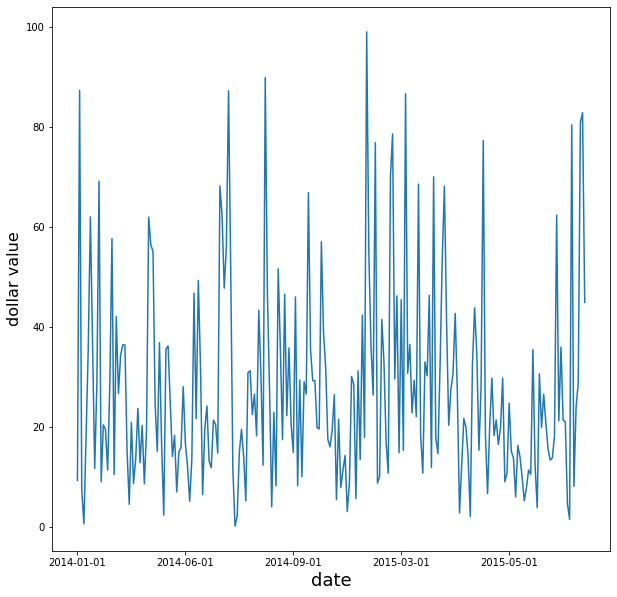

In [109]:
strategy1_plot.plot(figsize=(10,10))
plt.xlabel('date', fontsize=18)
plt.ylabel('dollar value', fontsize=16)

Text(0, 0.5, 'rolling average')

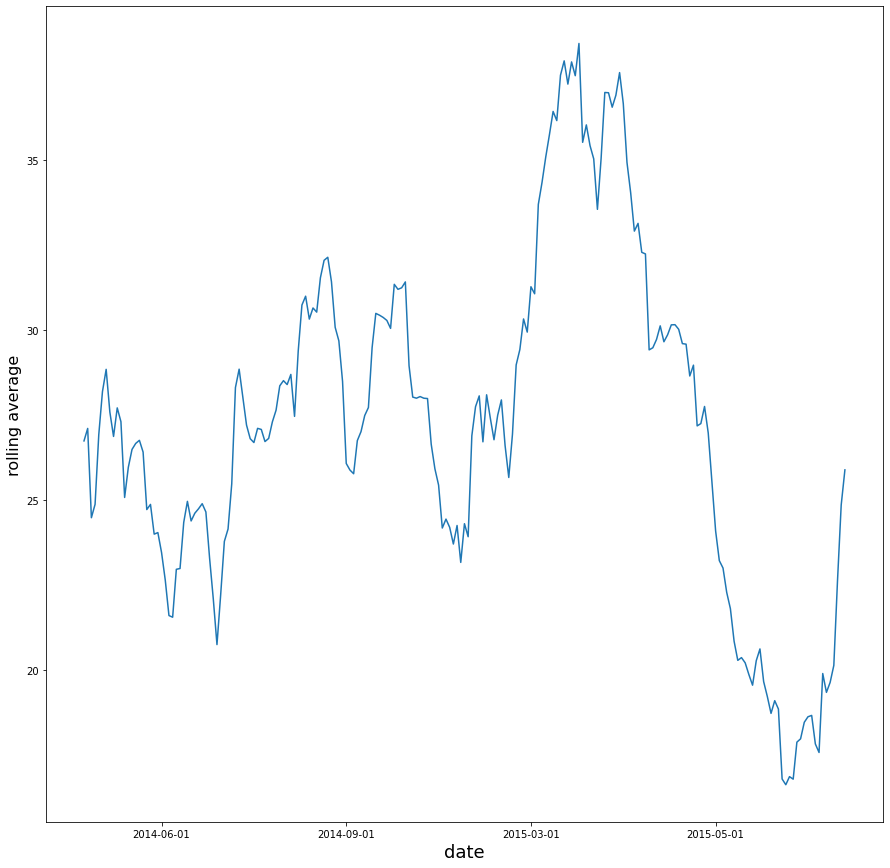

In [110]:
#Running average plot
strategy1_plot_avg.plot(figsize=(15,15),xlabel='date',ylabel='dollarvalue')
plt.xlabel('date', fontsize=18)
plt.ylabel('rolling average', fontsize=16)

In [91]:
### Handle missing values in strategy1 dollar value  for plotting purpose
strategy2_plot = accounts_w_strategies[accounts_w_strategies['str2_dollar_value'].notna()]['str2_dollar_value'].sort_index()

### Calculating running average to understand if there is seasonal change after 2015 (competitors were introduced)
strategy2_plot_avg= strategy2_plot.rolling(window=30).mean()

Text(0, 0.5, 'dollar value')

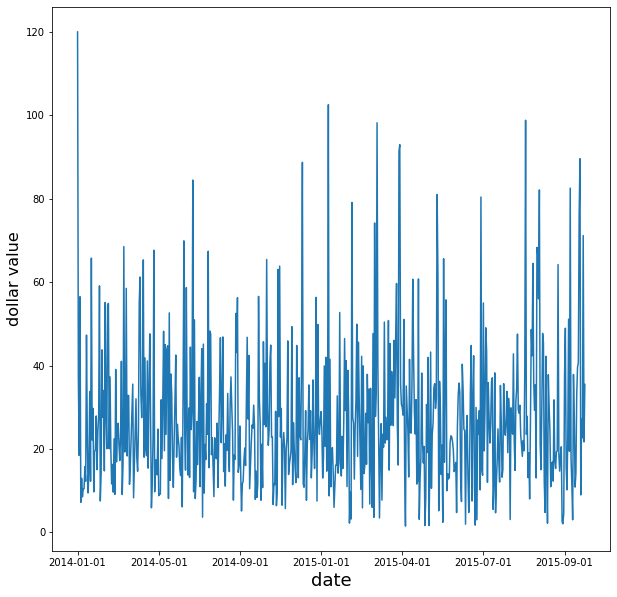

In [111]:
strategy2_plot.plot(figsize=(10,10))
plt.xlabel('date', fontsize=18)
plt.ylabel('dollar value', fontsize=16)

Text(0, 0.5, 'dollar value')

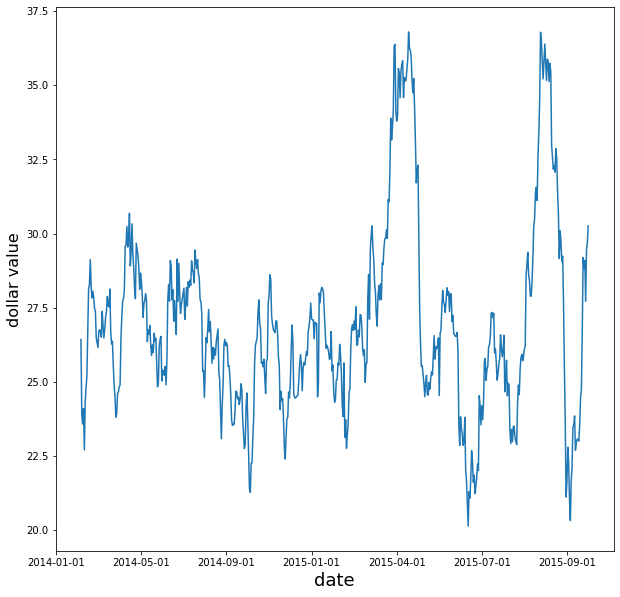

In [112]:
strategy2_plot_avg.plot(figsize=(10,10))
plt.xlabel('date', fontsize=18)
plt.ylabel('dollar value', fontsize=16)

In [114]:
### Handle missing values in strategy3 dollar value  for plotting purpose
strategy3_plot = accounts_w_strategies[accounts_w_strategies['str3_dollar_value'].notna()]['str3_dollar_value'].sort_index()

### Calculating running average to understand if there is seasonal change after 2015 (competitors were introduced)
strategy3_plot_avg= strategy3_plot.rolling(window=7).mean()

<AxesSubplot:xlabel='month'>

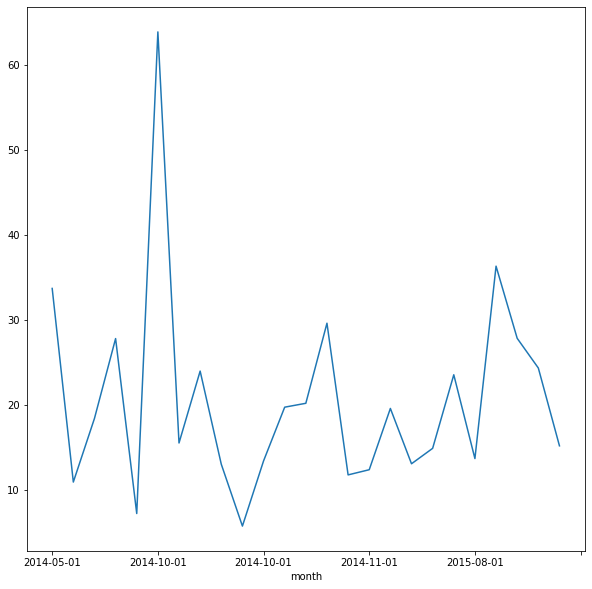

In [115]:
strategy3_plot.plot(figsize=(10,10))

<AxesSubplot:xlabel='month'>

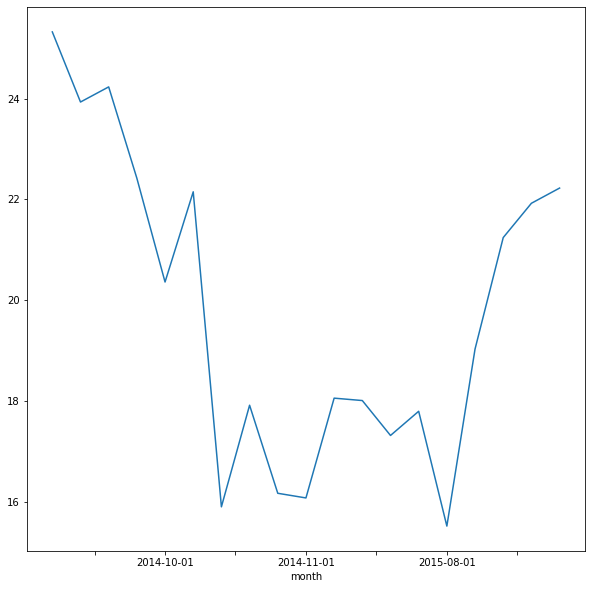

In [116]:
strategy3_plot_avg.plot(figsize=(10,10))

In [120]:
# Mean dollar value by accounts for strategy1
accounts_w_strategies.groupby(['accType'])['accType','str1_dollar_value'].mean().reset_index()

,accType,str1_dollar_value
0,Hospital,18.591248
1,Pharmacy,39.573313
2,Polyclinic,12.330730
3,Private Clinic,2.203229


In [121]:
# Mean dollar value calculation 
accounts_w_strategies.groupby(['accType'])['accType','str2_dollar_value'].mean().reset_index()

,accType,str2_dollar_value
0,Hospital,22.091921
1,Pharmacy,37.990231
2,Polyclinic,8.289421
3,Private Clinic,12.904761


In [123]:
# Mean dollar value calculation of hospitals for strategy1
accounts_w_strategies.groupby(['accType'])['accType','str3_dollar_value'].mean().reset_index()

,accType,str3_dollar_value
0,Hospital,17.350570
1,Pharmacy,31.499359
2,Polyclinic,NaN
3,Private Clinic,13.653186


In [125]:
accounts_w_strategies.groupby(['accType'])['accType'].count()

accType
Hospital          514
Pharmacy          294
Polyclinic         83
Private Clinic     41
Name: accType, dtype: int64